In [1]:
import pysam
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [30]:
cds_bed = '/public/home/mowp/test/nanopore_cdna/supplementary_data/representative_cds/representative_cds.bed'
BED_COLUMNS = ['seqid', 'start', 'end', 'transcipt_id',
               'score', 'strand']
cds_df = pd.read_csv(cds_bed, sep='\t', comment='#', names=BED_COLUMNS)
cds_df['gene_id'] = cds_df['transcipt_id'].map(lambda x: x.split('.')[0])
cds_df = cds_df.set_index('gene_id')

In [57]:
cds_df.head()

,seqid,start,end,transcipt_id,score,strand
gene_id,,,,,,
AT1G01010,1,3759,5630,AT1G01010.1,0,+
AT1G01020,1,6914,8666,AT1G01020.1,0,-
AT1G01030,1,11863,12940,AT1G01030.1,0,-
AT1G01040,1,23518,31079,AT1G01040.2,0,+
AT1G01050,1,31381,32670,AT1G01050.1,0,-


In [32]:
cds_dict = cds_df.to_dict(orient='index')

In [33]:
cds_dict['AT1G01010']

{'seqid': '1',
 'start': 3759,
 'end': 5630,
 'transcipt_id': 'AT1G01010.1',
 'score': 0,
 'strand': '+'}

In [110]:
def norm_bam_cov(infile, before=100, after=100):
    '''
    将CDS区划分成100份进行均一化
    before为cds上游100份
    after为cds下游100份
    '''
    #infile = '/public/home/mowp/test/nanopore_cdna/full_length_transcripts/fhh.full_length.sorted.bam'
    #norm_position = defaultdict(lambda: 0)
    count = 0
    norm_position = np.zeros(100+before+after)
    with pysam.AlignmentFile(infile, 'rb') as inbam:
        for read in inbam.fetch():
            read_transcript_id = read.get_tags()[-2][1]
            if read_transcript_id in cds_dict:
                transcipt_len = cds_dict[read_transcript_id]['end']-cds_dict[read_transcript_id]['start']
                if not read.is_reverse:
                    norm_start = round((read.reference_start - cds_dict[read_transcript_id]['start']) / transcipt_len * 100)
                    norm_end = round((read.reference_end - cds_dict[read_transcript_id]['start']) / transcipt_len * 100)
                else:
                    norm_start = round(((cds_dict[read_transcript_id]['end'] - read.reference_end) / transcipt_len) * 100)
                    norm_end = round(((cds_dict[read_transcript_id]['end'] - read.reference_start) / transcipt_len) * 100)
                
                #count += 1
                # 超过before和after范围的忽略
                if norm_start+before < 0:
                    norm_start = -before
                if norm_end > 100+after-1:
                    norm_end = 100-1
                norm_position[norm_start+before: norm_end+after] += 1
    return norm_position / sum(norm_position)

In [111]:
full_length_bam = '/public/home/mowp/test/nanopore_cdna/full_length_transcripts/fhh.full_length.sorted.bam'
full_length_cov = norm_bam_cov(full_length_bam)

In [112]:
all_read_bam = '/public/home/mowp/test/nanopore_cdna/aligned_data/fhh.tagged.mm2.sorted.bam'
all_read_cov = norm_bam_cov(tagged_bam)

In [113]:
non_full_length_bam = '/public/home/mowp/test/nanopore_cdna/full_length_transcripts/fhh.non_full_length.sorted.bam'
non_full_length_cov = norm_bam_cov(non_full_length_bam)

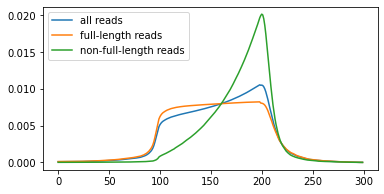

In [114]:
plt.figure(figsize=(6, 3))
plt.plot(all_read_cov, label='all reads')
plt.plot(full_length_cov, label='full-length reads')
plt.plot(non_full_length_cov, label='non-full-length reads')
plt.legend()
plt.show()

In [115]:
! sendEmail.py

In [116]:
a = {'1': 1, '2': 2, '3': 3}

In [118]:
dict(a)

{'1': 1, '2': 2, '3': 3}